In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy.signal
%matplotlib inline

In [3]:
df = pd.read_csv("out_O2_taub.csv")
T, nb_sim = np.shape(df)
nb_sim -= 1
print("Time horizon:", T)
print("Number of simulations:", nb_sim)

('Time horizon:', 36)
('Number of simulations:', 100)


In [8]:
def plot_data(df):
    variables = [col for col in list(df.columns) if 'V' in col]
    
    plt.figure()
    for col in variables:
        plt.plot(df[col])
    plt.title('O2 evolution on {} simulations'.format(len(variables)))
    plt.ylabel('O2')
    plt.xlabel('time')
    plt.show()

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']


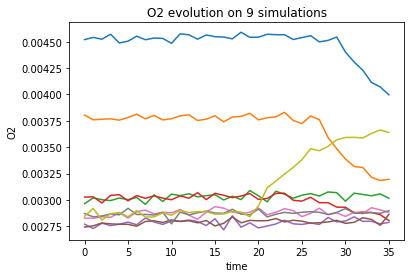

In [12]:
var = ['V' + str(i) for i in range(1, 10)]
print(var)
plot_data(df[var])

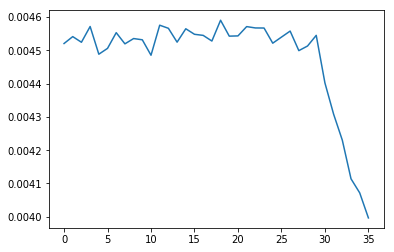

In [17]:
test_signal = df['V1']
plt.plot(test_signal)

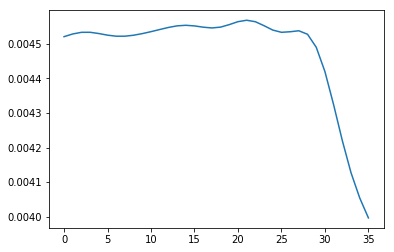

In [25]:
def lowpass(signal):
    b,a = scipy.signal.iirdesign(0.3, 0.4, 3, 60, analog=False, ftype='cheby2', output='ba')
    temp1 = scipy.signal.lfilter(b, a, signal, axis=-1, zi=None)
    temp2 = scipy.signal.lfilter(b, a, temp1, axis=-1, zi=None)
    filtered_signal = scipy.signal.filtfilt(b, a, signal)
    return filtered_signal
